## Imports Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, plot_confusion_matrix

## Data

In [2]:
data = pd.read_csv('waterquality.csv')

In [3]:
data.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


we can see in all feature column that the value is numeric

In [4]:
data.shape

(7999, 21)

there are a number of samples, namely 7999 rows and 21 columns

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

there is an oddity in the ammonia and is_safe columns that the column should be of type numeric but we see it turns out to be an object

let's see what values are in the ammonia and is_safe columns

In [6]:
data.is_safe.value_counts()

0        7084
1         912
#NUM!       3
Name: is_safe, dtype: int64

the value #NUM! which makes the is_safe column an object that should be numeric

In [7]:
missing_value = ['#NUM!', np.nan]
data = pd.read_csv('waterquality.csv', na_values=missing_value )

let's create a variable for the #NUM! then change the value to NAN and we load the dataset again and add na_values for the missing value

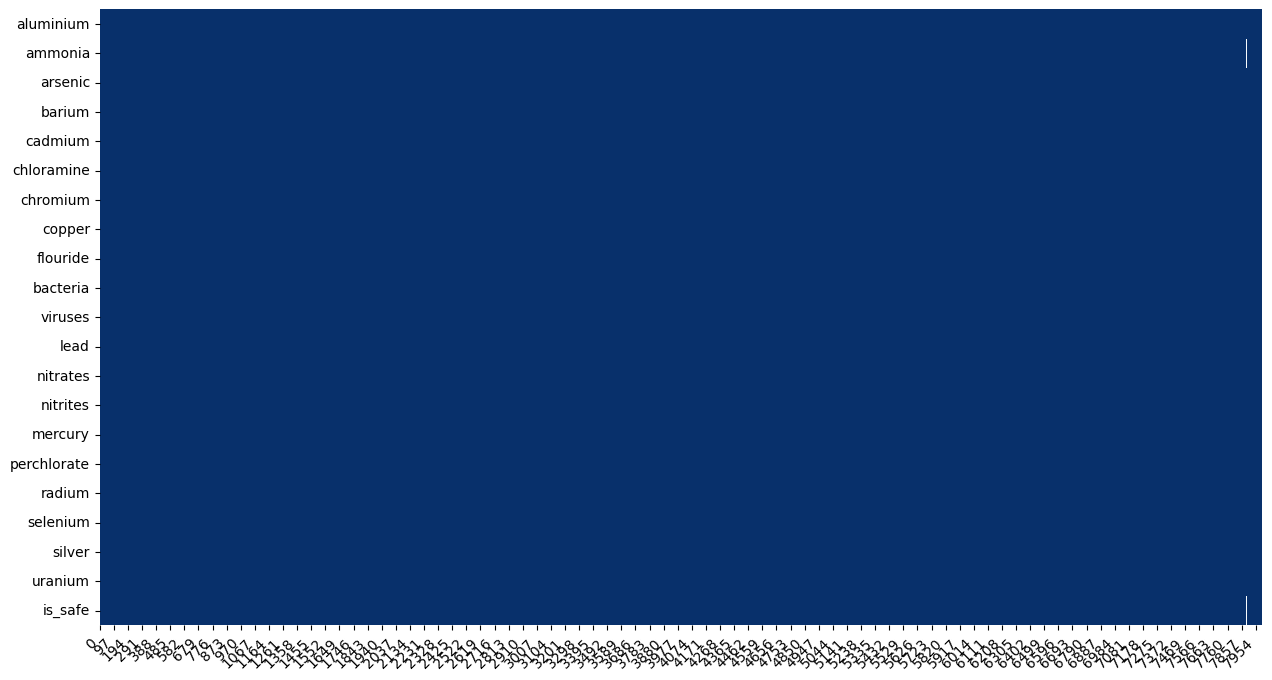

In [8]:
from jcopml.plot import plot_missing_value
plot_missing_value(data)

there are missing values in the ammonia and is_safe columns after we change them to NAN

In [9]:
data.dropna(subset=['ammonia', 'is_safe'], axis=0, inplace=True)

let's remove the missing value because only a few are missing

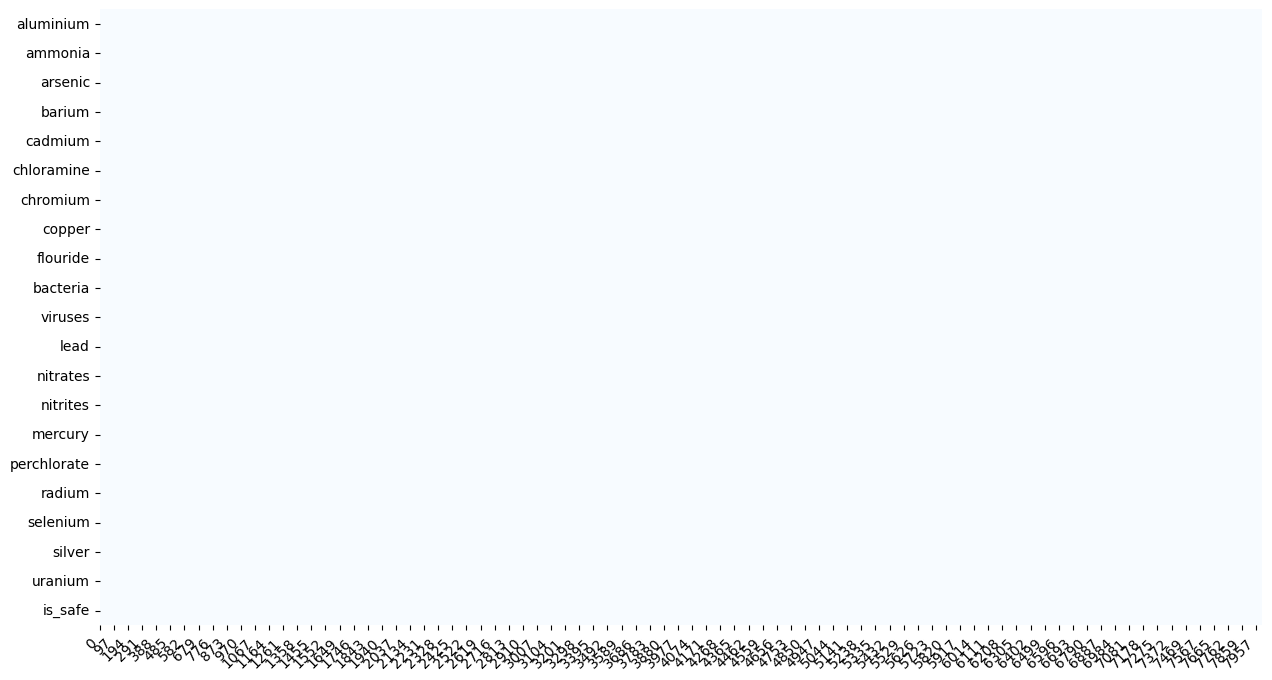

In [10]:
plot_missing_value(data)

the data is clean from the missing value can be seen from the color change

In [11]:
data['is_safe'].value_counts()

0.0    7084
1.0     912
Name: is_safe, dtype: int64

there are many labels in the column is_safe
where label 0 is 7084 samples and label 1 is 912 samples

## Exploratory Data Analysis

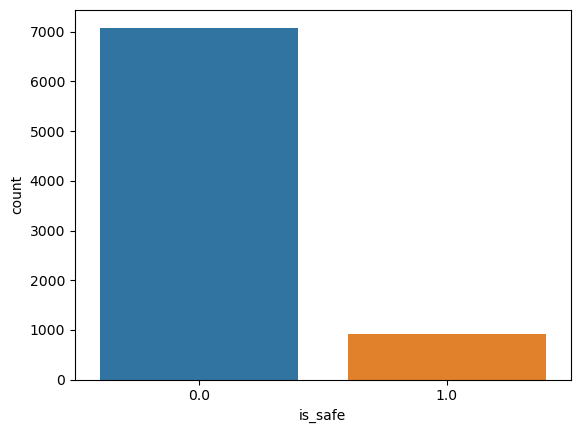

In [12]:
sns.countplot(data=data, x='is_safe');

there is more data for label 0 than for label 1 this causes an unbalanced sample

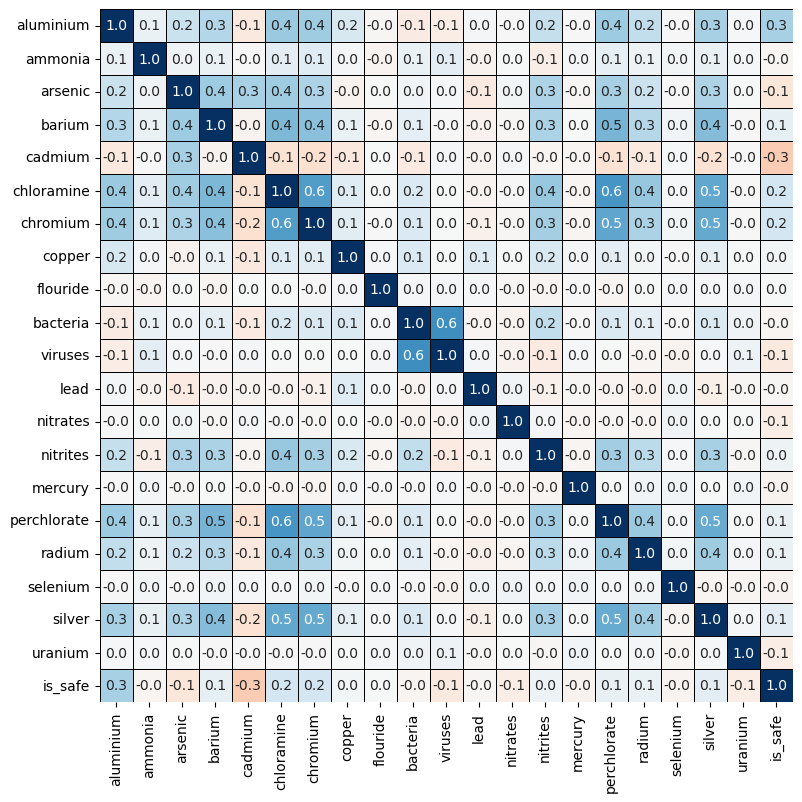

In [13]:
plt.figure(figsize=(16,9))
sns.heatmap(data.corr(), annot=True, linewidths=0.5, fmt='.1f', cmap='RdBu', 
            cbar=False, square=True, linecolor='black', vmin=-1, vmax=1);

In the picture above, you can see the correlation between each table using a heatmap

<AxesSubplot:>

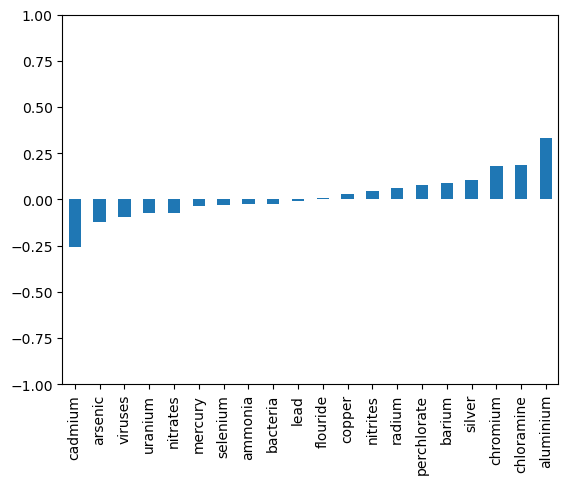

In [14]:
plt.ylim(-1,1)
data.corr()['is_safe'][:-1].sort_values().plot(kind='bar')

In the image above we can see the correlation between the feature and the target label, where aluminium is the column with the highest correlation with the target label

## Splitting Data

In [15]:
X = data.drop('is_safe', axis=1)  
y = data['is_safe'] 

separate between the feature column and the label column where the label column is only is_safe

In [16]:
X.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,0.000,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,0.650,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,0.003,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,0.710,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,0.001,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02


variable X has been separated from the label

In [17]:
y.head().to_frame()

,is_safe
0,1.0
1,1.0
2,0.0
3,1.0
4,1.0


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y , random_state=77)
print(f"X_train : {X_train.shape} y_train : {y_train.shape} X_test : {X_test.shape} y_test : {y_test.shape}")

X_train : (6396, 20) y_train : (6396,) X_test : (1600, 20) y_test : (1600,)


let's train_test_split to divide the size of the training data and test data by 20% split and use the parameter stratify for the labels to make the splits even

## Create Model with Pipeline

In [19]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('algo', RandomForestClassifier(n_estimators=100))
])

use the pipeline for the scaler data train and test processes to prevent data leakage and add the Random Forest Classifier algorithm for the model creation process

In [20]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('algo', RandomForestClassifier())])

fit data X_train and y_train using pipeline

score train : 1.0 score test : 0.9625

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98      1418
         1.0       0.94      0.71      0.81       182

    accuracy                           0.96      1600
   macro avg       0.95      0.85      0.90      1600
weighted avg       0.96      0.96      0.96      1600



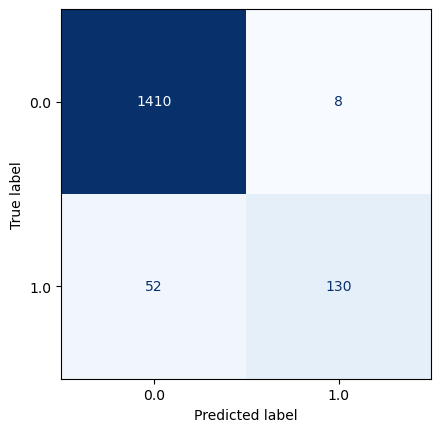

In [21]:
y_pred_pipeline = pipeline.predict(X_test)
print(f'score train : {pipeline.score(X_train,y_train)} score test : {pipeline.score(X_test,y_test)}\n')
print(classification_report(y_test, y_pred_pipeline))
plot_confusion_matrix(pipeline, X_test, y_test, colorbar=False, cmap='Blues');

<b>let's check the score results from the fit results using the pipeline,
For the score results for the train data, we get 100% accuracy and for the test data we get 96,25% accuracy as well, that's great!! and the prediction results guess that there are 8 errors in guessing the label 0 is 1 which is a false positive, that's very good because our goal is to minimize the error in false positives

## Using GridSearchCV

In [22]:
parameter = {'algo__n_estimators': [100, 150, 200], 'algo__max_depth': [20, 50, 80],
             'algo__max_features': [0.3, 0.6, 0.8], 'algo__min_samples_leaf': [1, 5, 10]}

parameters GridSearchCV for the Random Forest Classifier algorithm

In [23]:
model = GridSearchCV(estimator=pipeline, param_grid=parameter, cv=5, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('algo', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'algo__max_depth': [20, 50, 80],
                         'algo__max_features': [0.3, 0.6, 0.8],
                         'algo__min_samples_leaf': [1, 5, 10],
                         'algo__n_estimators': [100, 150, 200]},
             verbose=1)

use GridSearchCV to combine the pipeline and fill param_grid with the parameters we created earlier, use 5 fold cross validation and refit the model

In [24]:
print(f'{model.best_params_}\n')

{'algo__max_depth': 50, 'algo__max_features': 0.6, 'algo__min_samples_leaf': 1, 'algo__n_estimators': 200}



the best parameter for Random Forest Classifier is max_depth : 50, max_features : 0.6, min_samples_leaf : 1, n_estimator : 200

score train : 1.0 | score test : 0.973125

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98      1418
         1.0       0.94      0.82      0.87       182

    accuracy                           0.97      1600
   macro avg       0.96      0.91      0.93      1600
weighted avg       0.97      0.97      0.97      1600



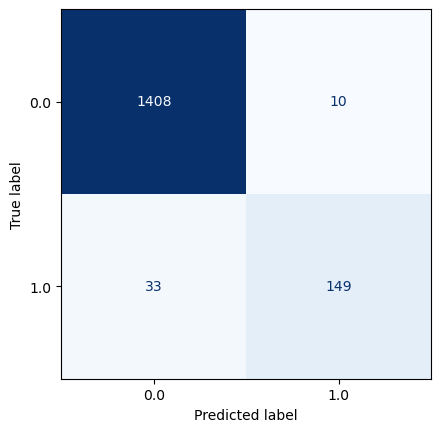

In [25]:
y_pred_grid = model.predict(X_test)
print(f'score train : {model.score(X_train,y_train)} | score test : {model.score(X_test,y_test)}\n')
print(classification_report(y_test, y_pred_grid))
plot_confusion_matrix(model, X_test, y_test, colorbar=False, cmap='Blues');

<b>let's check again the score results from the fit results using GridSearchCV,
For the scores for the training data, we get an accuracy of 100% and for the test data, we get an accuracy of 97.31%, and for the test data, it doesn't change much!! and the results of the guess prediction there are 10 errors in guessing the label 0 is 1 which is a false positive, using GridSearchCV doesn't really affect the score model results instead it adds to the error in guessing the label 0 is 1 it's dangerous, so it's better for us to use a model without GridSearchCV for this case.